In [1]:
import pandas as pd
import numpy as mp

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
training=pd.read_csv("train.csv")
testing=pd.read_csv("test.csv")

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(pd.isnull(training).sum()) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
print(pd.isnull(testing).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [17]:
training.drop(labels=["Cabin","Ticket"],axis=1,inplace=True)
testing.drop(labels=["Cabin","Ticket"],axis=1,inplace=True)

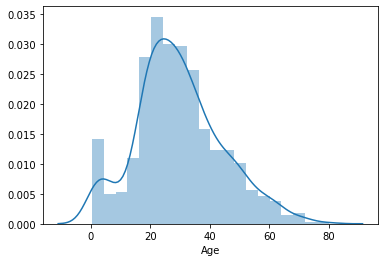

In [20]:
sns.distplot(training["Age"])

In [21]:
training['Age'].fillna(training["Age"].median(),inplace=True)
testing['Age'].fillna(testing["Age"].median(),inplace=True)
training["Embarked"].fillna("S",inplace=True)
testing['Fare'].fillna(testing['Fare'].median(),inplace=True)

In [25]:
print(pd.isnull(training).sum()) 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [26]:
print(pd.isnull(testing).sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


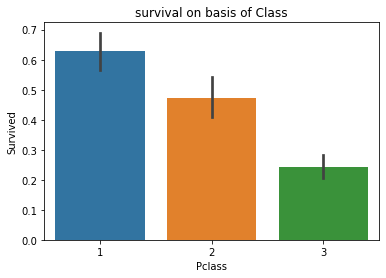

In [28]:
sns.barplot(x='Pclass',y='Survived', data=training)
plt.title("survival on basis of Class")
plt.show()

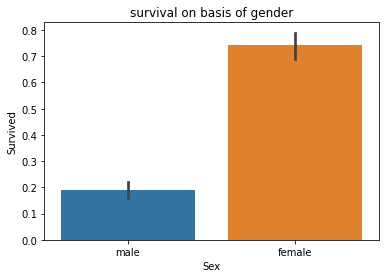

In [29]:
sns.barplot(x="Sex",y="Survived",data=training)
plt.title("survival on basis of gender")
plt.show()

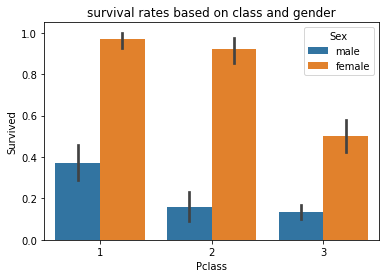

In [30]:
sns.barplot(x="Pclass",y="Survived",hue='Sex',data=training)
plt.title("survival rates based on class and gender")
plt.show()

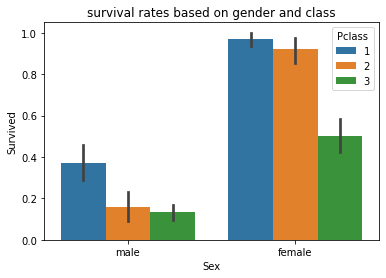

In [32]:
sns.barplot(x="Sex",y="Survived",hue='Pclass',data=training)
plt.title("survival rates based on gender and class")
plt.show()

In [33]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]


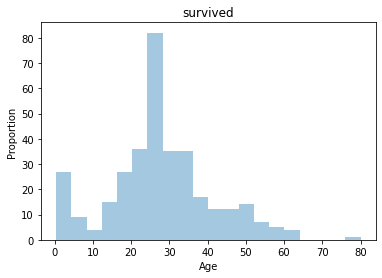

In [36]:
sns.distplot(survived_ages, kde=False)
plt.title("survived")
plt.ylabel("Proportion")
plt.show()

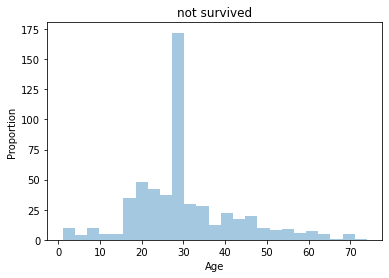

In [37]:
sns.distplot(not_survived_ages, kde=False)
plt.title("not survived")
plt.ylabel("Proportion")
plt.show()

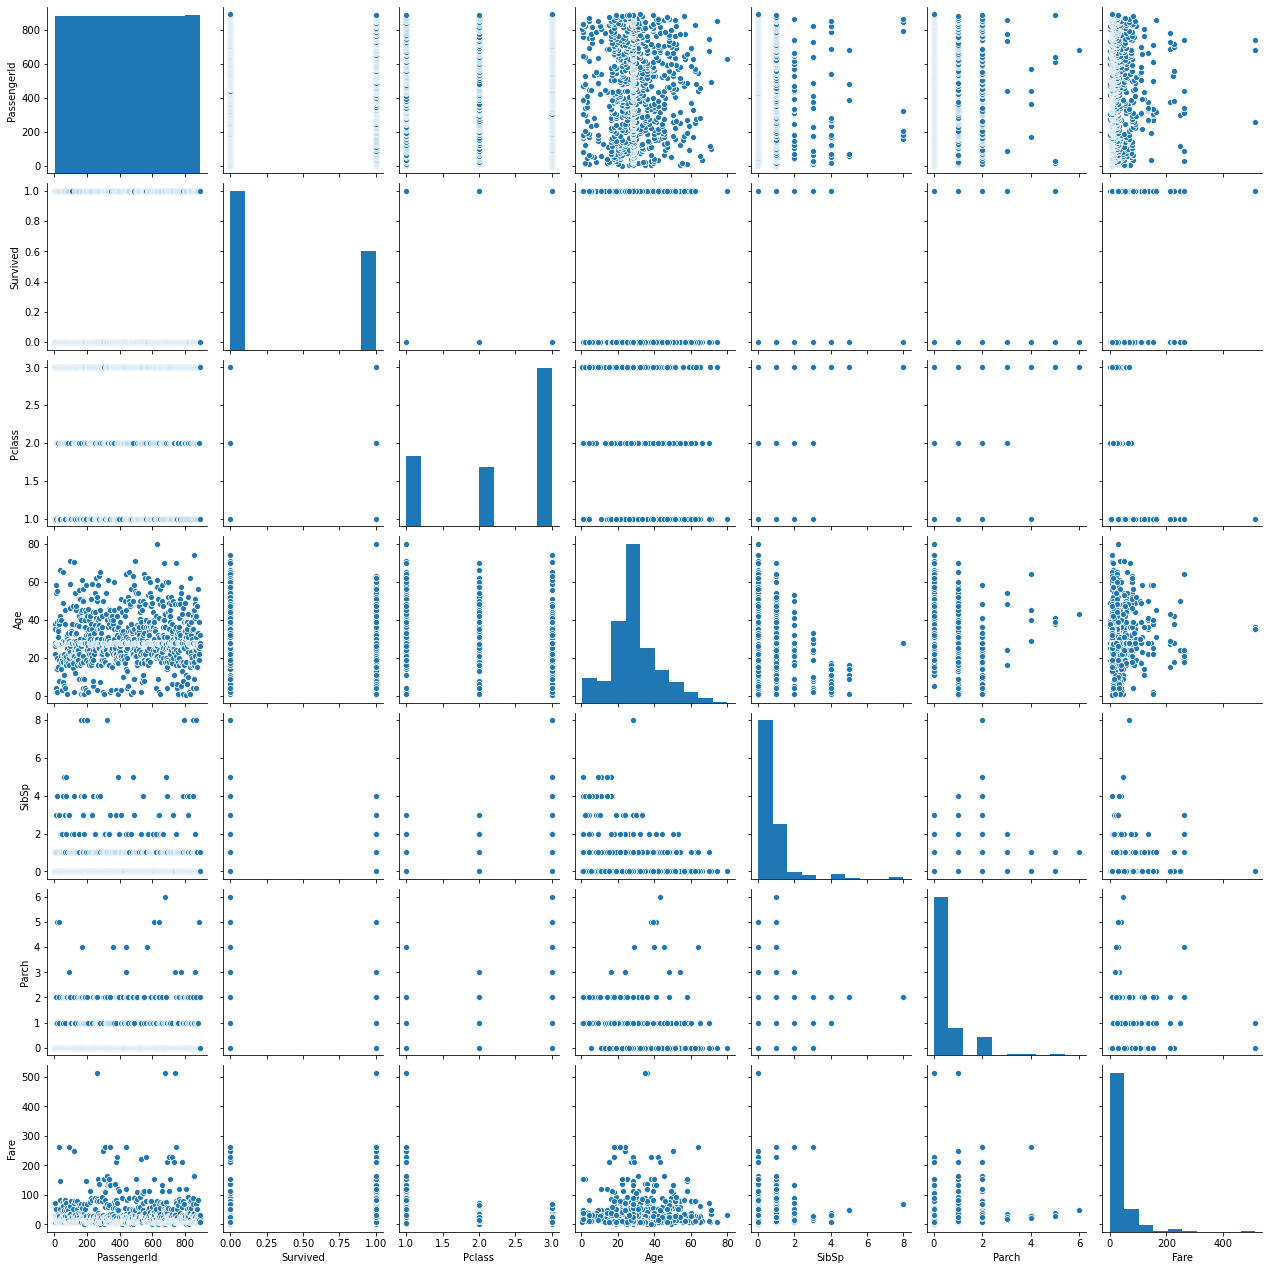

In [38]:
sns.pairplot(training)

In [41]:
training.loc[training["Sex"]=="male","Sex"]=0
training.loc[training["Sex"]=="female","Sex"]=1

testing.loc[testing["Sex"]=="male","Sex"]=0
testing.loc[testing["Sex"]=="female","Sex"]=1

training.loc[training["Embarked"]=="S","Embarked"]=0
training.loc[training["Embarked"]=="C","Embarked"]=1
training.loc[training["Embarked"]=="Q","Embarked"]=2

testing.loc[testing["Embarked"]=="S","Embarked"]=0
testing.loc[testing["Embarked"]=="C","Embarked"]=1
testing.loc[testing["Embarked"]=="Q","Embarked"]=2

In [42]:
training.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",0,49.0,1,0,56.9292,1
338,339,1,3,"Dahl, Mr. Karl Edwart",0,45.0,0,0,8.0500,0
308,309,0,2,"Abelson, Mr. Samuel",0,30.0,1,0,24.0000,1
733,734,0,2,"Berriman, Mr. William John",0,23.0,0,0,13.0000,0
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
657,658,0,3,"Bourke, Mrs. John (Catherine)",1,32.0,1,1,15.5000,2
602,603,0,1,"Harrington, Mr. Charles H",0,28.0,0,0,42.4000,0
84,85,1,2,"Ilett, Miss. Bertha",1,17.0,0,0,10.5000,0
193,194,1,2,"Navratil, Master. Michel M",0,3.0,1,1,26.0000,0
788,789,1,3,"Dean, Master. Bertram Vere",0,1.0,1,2,20.5750,0


In [43]:
testing.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
334,1226,3,"Cor, Mr. Ivan",0,27.0,0,0,7.8958,0
224,1116,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",1,53.0,0,0,27.4458,1
52,944,2,"Hocking, Miss. Ellen Nellie""""",1,20.0,2,1,23.0000,0
373,1265,2,"Harbeck, Mr. William H",0,44.0,0,0,13.0000,0
112,1004,1,"Evans, Miss. Edith Corse",1,36.0,0,0,31.6792,1
163,1055,3,"Pearce, Mr. Ernest",0,27.0,0,0,7.0000,0
26,918,1,"Ostby, Miss. Helene Ragnhild",1,22.0,0,1,61.9792,1
76,968,3,"Miles, Mr. Frank",0,27.0,0,0,8.0500,0
16,908,2,"Keane, Mr. Daniel",0,35.0,0,0,12.3500,2
55,947,3,"Rice, Master. Albert",0,10.0,4,1,29.1250,2


In [49]:
x=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
x_train=training[x]
y_train=training['Survived']
x_test=testing[x]

In [52]:
from sklearn.model_selection import train_test_split

x_training,x_valid,y_training,y_valid=train_test_split(x_train,y_train,test_size=0.2,random_state=80)

In [61]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_training=SC.fit_transform(x_training)
x_valid=SC.transform(x_valid)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_training,y_training)
pred_LR=LR.predict(x_valid)
acc_LR=accuracy_score(y_valid,pred_LR)
print("accuracy of Logistic Regression model is:",acc_LR*100,"%")

accuracy of Logistic Regression model is: 75.97765363128491 %


In [66]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_training,y_training)
pred_DT=DT.predict(x_valid)
acc_DT=accuracy_score(y_valid,pred_DT)
print("accuracy of Decision Tree Classifier is:",acc_DT*100,"%")

accuracy of Decision Tree Classifier is: 76.53631284916202 %


In [69]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(x_training,y_training)
pred_GNB=GNB.predict(x_valid)
acc_GNB=accuracy_score(y_valid,pred_GNB)
print("accuracy of Gaussian Naivebayes model is",acc_GNB*100,"%")

accuracy of Gaussian Naivebayes model is 76.53631284916202 %


In [73]:
best_model=pd.DataFrame({"Model":["Logistic Regression","Decision Tree","Gaussian Naive Bayes"],"Accuracy(%)":[acc_LR*100,acc_DT*100,acc_GNB*100]})
best_model.sort_values(by="Accuracy(%)",ascending=False)

,Model,Accuracy(%)
1,Decision Tree,76.536313
2,Gaussian Naive Bayes,76.536313
0,Logistic Regression,75.977654
